In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [2]:
class RidgeRegression():
    
    def __init__( self, learning_rate, iterations, l2_penality ) : 
          
        self.learning_rate = learning_rate         
        self.iterations = iterations         
        self.l2_penality = l2_penality 
        
    def fit(self, X, Y) :
        self.m, self.n = X.shape
        
        self.W = np.zeros(self.n)
        
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.iterations) :
            self.update_weights()
        return self
    
    def update_weights(self) :
        Y_pred = self.predict(self.X)
        
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m      
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
        
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db         
        return self
    
    def predict( self, X ) :     
        return X.dot( self.W ) + self.b 
        

Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731. 122391.  57081.]
Trained W         9325.76
Trained b         26842.8


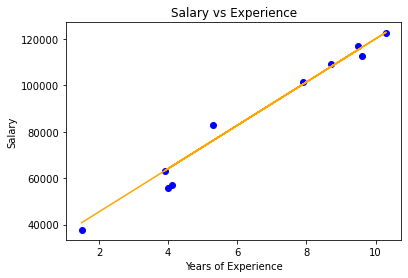

In [3]:
def main() :
    df = pd.read_csv("salary_data.csv")
    X = df.iloc[:, :-1].values 
    Y = df.iloc[:, 1].values 
    
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1 / 3, random_state = 0 ) 
    
    model = RidgeRegression( iterations = 1000, learning_rate = 0.01, l2_penality = 1 ) 
    model.fit( X_train, Y_train ) 
    
    Y_pred = model.predict( X_test )     
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )      
    print( "Real values      ", Y_test[:3] )     
    print( "Trained W        ", round( model.W[0], 2 ) )     
    print( "Trained b        ", round( model.b, 2 ) ) 
    
    plt.scatter( X_test, Y_test, color = 'blue' )     
    plt.plot( X_test, Y_pred, color = 'orange' )     
    plt.title( 'Salary vs Experience' )     
    plt.xlabel( 'Years of Experience' )     
    plt.ylabel( 'Salary' )     
    plt.show() 
      
if __name__ == "__main__" :  
    main() 